In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np


In [11]:

df = pd.read_csv("D:\DataMining\projectphase2\Loan-prediction\Project\Cleaned_Loan_Train_Data.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (520, 13)


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dell\AppData\Local\Temp\ipykernel_27956\4103046468.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DataMining\projectphase2\Loan-prediction\Project\Cleaned_Loan_Train_Data.csv")


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.070489,0.000000,0.198860,0.74359,1,1,0,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1,0,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1,1,0,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1,1,0,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1,1,0,1


In [12]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(416, 12) (104, 12)


In [13]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


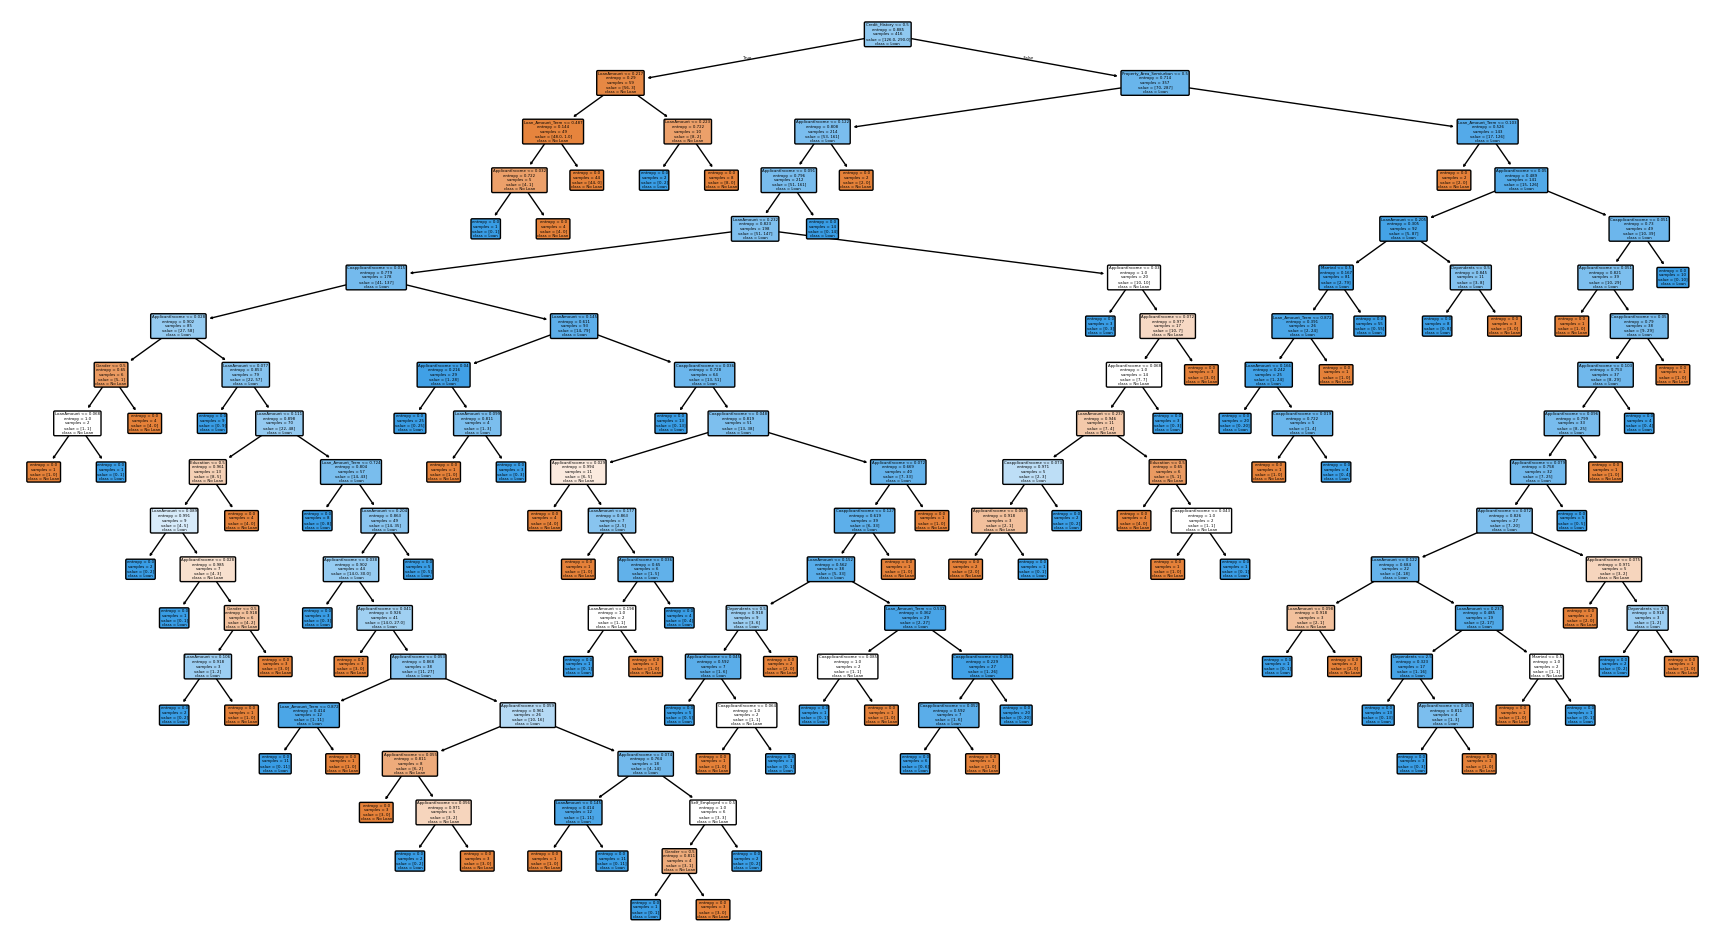

In [14]:
plt.figure(figsize=(22,12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Loan","Loan"],
    filled=True,
    rounded=True
)
plt.show()


In [15]:
y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6826923076923077

Confusion Matrix:
 [[18 14]
 [19 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.56      0.52        32
           1       0.79      0.74      0.76        72

    accuracy                           0.68       104
   macro avg       0.64      0.65      0.64       104
weighted avg       0.70      0.68      0.69       104



In [16]:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)      # Recall
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

Accuracy: 0.6826923076923077
Error rate: 0.3173076923076923
Sensitivity (Recall): 0.7361111111111112
Specificity: 0.5625
Precision: 0.7910447761194029


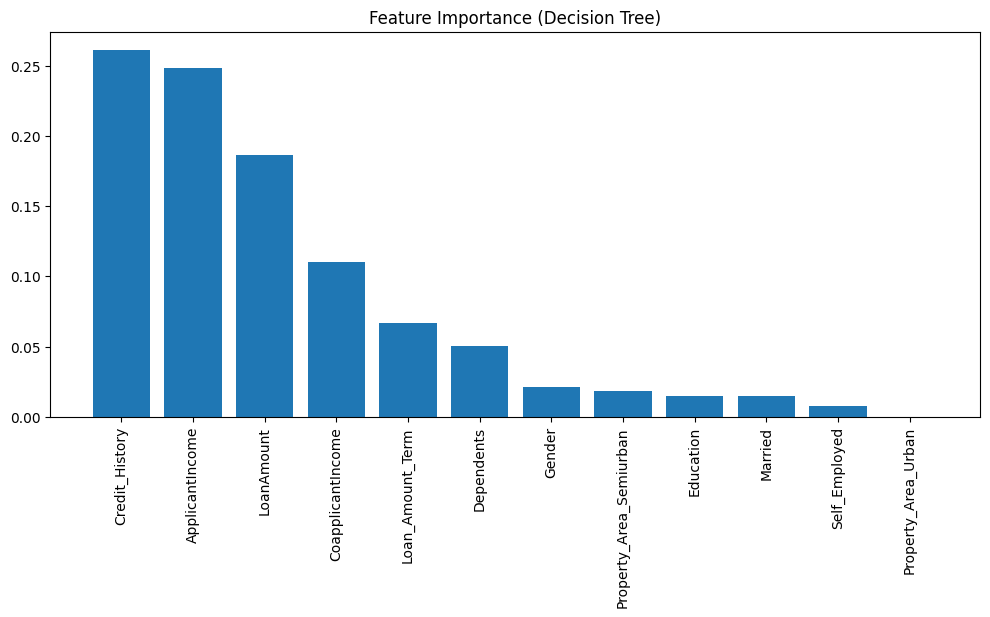

Credit_History: 0.2610
ApplicantIncome: 0.2482
LoanAmount: 0.1865
CoapplicantIncome: 0.1102
Loan_Amount_Term: 0.0671
Dependents: 0.0500
Gender: 0.0215
Property_Area_Semiurban: 0.0186
Education: 0.0149
Married: 0.0146
Self_Employed: 0.0075
Property_Area_Urban: 0.0000


In [17]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,5))
plt.title("Feature Importance (Decision Tree)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()

for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")

In [18]:
new_customers = pd.read_csv("New Customer.csv")

# 1. Drop Loan_ID (not used for prediction)
if "Loan_ID" in new_customers.columns:
    new_customers.drop(columns=["Loan_ID"], inplace=True)

# 2. Fix Dependents
new_customers["Dependents"] = new_customers["Dependents"].replace("3+", 3)
new_customers["Dependents"] = pd.to_numeric(new_customers["Dependents"], errors="coerce")

# 3. Fill missing credit history with mode
new_customers["Credit_History"].fillna(new_customers["Credit_History"].mode()[0], inplace=True)

# 4. Label encode binary columns
from sklearn.preprocessing import LabelEncoder

binary_cols = ["Gender", "Married", "Education", "Self_Employed"]
le = LabelEncoder()

for col in binary_cols:
    new_customers[col] = le.fit_transform(new_customers[col])

# 5. One-hot encode Property_Area
new_customers = pd.get_dummies(new_customers, columns=["Property_Area"], drop_first=True)

# 6. Normalize numeric columns using SAME scaler used before
from sklearn.preprocessing import MinMaxScaler

num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Dependents"]
scaler = MinMaxScaler()
new_customers[num_cols] = scaler.fit_transform(new_customers[num_cols])

print(new_customers)


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1    0.000000          0              0         0.078865   
1         1        1    0.333333          0              0         0.042411   
2         1        1    0.666667          0              0         0.068938   
3         1        1    0.666667          0              0         0.032263   
4         1        0    0.000000          1              0         0.045168   
..      ...      ...         ...        ...            ...              ...   
362       1        1    1.000000          1              1         0.055274   
363       1        1    0.000000          0              0         0.057329   
364       1        0    0.000000          0              0         0.044810   
365       1        1    0.000000          0              0         0.068938   
366       1        0    0.000000          0              1         0.126846   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\Dell\AppData\Local\Temp\ipykernel_27956\3267745485.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_customers["Credit_History"].fillna(new_customers["Credit_History"].mode()[0], inplace=True)


In [19]:
new_customers = new_customers.reindex(columns=X.columns, fill_value=0)


In [20]:
predictions = dt_model.predict(new_customers)
predictions


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [21]:
for i, p in enumerate(predictions):
    print(f"Customer {i+1}: {'Approved' if p==1 else 'Rejected'}")


Customer 1: Rejected
Customer 2: Approved
Customer 3: Approved
Customer 4: Approved
Customer 5: Rejected
Customer 6: Approved
Customer 7: Approved
Customer 8: Rejected
Customer 9: Rejected
Customer 10: Approved
Customer 11: Approved
Customer 12: Approved
Customer 13: Approved
Customer 14: Rejected
Customer 15: Approved
Customer 16: Rejected
Customer 17: Rejected
Customer 18: Approved
Customer 19: Rejected
Customer 20: Approved
Customer 21: Approved
Customer 22: Approved
Customer 23: Rejected
Customer 24: Approved
Customer 25: Rejected
Customer 26: Rejected
Customer 27: Approved
Customer 28: Approved
Customer 29: Approved
Customer 30: Rejected
Customer 31: Approved
Customer 32: Rejected
Customer 33: Approved
Customer 34: Rejected
Customer 35: Approved
Customer 36: Rejected
Customer 37: Approved
Customer 38: Approved
Customer 39: Approved
Customer 40: Approved
Customer 41: Approved
Customer 42: Approved
Customer 43: Approved
Customer 44: Approved
Customer 45: Rejected
Customer 46: Reject